<a href="https://colab.research.google.com/github/papchukev/demo/blob/main/web-scraping_pythonBS%2Brequests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web-scraping на языке Python

Инструкция:

Шаг 1. Выполните web-scraping сайта с использованием библиотеки BeautifulSoup.

Шаг 2. Выполните HTML разбор текста.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
link = 'https://litmir.org/lastnews/'
page = requests.get(link).text

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="ru">
<head>
<meta charset="utf-8"/>
<title>Последние публикации на сайте » ЛитМир - Читайте и скачивайте книги на сайте Litmir</title>
<meta content="Litmir.org – это место, где вы можете читать и скачивать книги online. Выбирайте книги любых жанров и скачивайте бесплатно в библиотеке Литмир" name="description"/>
<meta content="Книги, литмир, litmir, онлайн, бесплатно, без регистрации, полностью, русские, хорошие, электронные,  библиотека" name="keywords"/>
<link href="https://litmir.org/index.php?do=opensearch" rel="search" title="ЛитМир - Читайте и скачивайте книги на сайте Litmir" type="application/opensearchdescription+xml"/>
<link href="https://litmir.org/lastnews/" rel="canonical"/>
<link href="https://litmir.org/rss.xml" rel="alternate" title="ЛитМир - Читайте и скачивайте книги на сайте Litmir" type="application/rss+xml"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/templates/khit
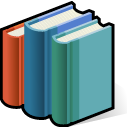

In [ ]:
soup = BeautifulSoup(page, 'lxml')
print(soup.prettify)

In [ ]:
books = soup.find_all('div', attrs = {'class' : 'short clearfix with-mask'})

In [ ]:
len(books)

20

In [ ]:
books[0]

<div class="short clearfix with-mask">
<div class="short-img img-box">
<img alt="Брачный приговор  - Лав Агата" src="/uploads/posts/books/293036/293036.jpg"/>
<div class="mask flex-col ps-link" data-href="https://litmir.org/books/love-/sovremennye-ljubovnye-romany/293036-brachnyi-prigovor-si-lav-agata.html">
<span class="fa fa-book"></span>
</div>
</div>
<div class="short-text">
<a class="short-title" href="https://litmir.org/books/love-/sovremennye-ljubovnye-romany/293036-brachnyi-prigovor-si-lav-agata.html">Брачный приговор - Лав Агата</a>
<div class="to-fav">
<span class="fa fa-star fav-guest" title="Добавить в закладки"></span>
</div>
<div class="short-desc">
<div class="sd-line"><span>Жанр:</span> <a href="https://litmir.org/books/">Книги</a> / <a href="https://litmir.org/books/love-/">Любовные романы</a> / <a href="https://litmir.org/books/love-/sovremennye-ljubovnye-romany/">Современные любовные романы</a></div>
<div class="sd-line"><span>Название:</span> Брачный приговор (СИ)</

In [ ]:
books[0].find_all('div', attrs = {'class' : 'sd-line'})[0].get_text(strip=True)[5:]

'Книги/Любовные романы/Современные любовные романы'

In [ ]:
books[0].find_all('div', attrs = {'class' : 'sd-line'})[1].get_text(strip=True)[9:]

'Брачный приговор (СИ)'

In [ ]:
books[0].find_all('div', attrs = {'class' : 'sd-line'})[2].get_text(strip=True)[6:]

'Лав Агата'

In [ ]:
books[0].find_all('div', attrs = {'class' : 'sd-line'})[3].get_text(strip=True)[9:]

'ОНА ДОЛЖНА БЫЛА СТАТЬ РАЗМЕННОЙ МОНЕТОЙ. НО СТАЛА ЕГО СУДЬБОЙ — Ваш муж погиб сегодня. — Фиктивный муж, — я поправляю юриста. — У нас не было отношений, он навязал мне контракт силой. —'

In [ ]:
books[0].find('a').get('href')

'https://litmir.org/books/love-/sovremennye-ljubovnye-romany/293036-brachnyi-prigovor-si-lav-agata.html'

In [ ]:
list_books = list()
dict_books = dict.fromkeys(['title', 'author', 'genre', 'descrip', 'link'], 0)

In [ ]:
for n in range(0, len(books)):
    dict_books['title'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[1].get_text(strip=True)[9:]
    dict_books['author'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[2].get_text(strip=True)[6:]
    dict_books['genre'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[0].get_text(strip=True)[5:]
    dict_books['descrip'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[3].get_text(strip=True)[9:]
    dict_books['link'] = books[n].find('a').get('href')

    list_books.append(dict_books.copy())
print(list_books)

[{'title': 'Брачный приговор (СИ)', 'author': 'Лав Агата', 'genre': 'Книги/Любовные романы/Современные любовные романы', 'descrip': 'ОНА ДОЛЖНА БЫЛА СТАТЬ РАЗМЕННОЙ МОНЕТОЙ. НО СТАЛА ЕГО СУДЬБОЙ — Ваш муж погиб сегодня. — Фиктивный муж, — я поправляю юриста. — У нас не было отношений, он навязал мне контракт силой. —', 'link': 'https://litmir.org/books/love-/sovremennye-ljubovnye-romany/293036-brachnyi-prigovor-si-lav-agata.html'}, {'title': 'Девочка-лед (СИ)', 'author': 'Джолос Анна', 'genre': 'Книги/Любовные романы/Современные любовные романы', 'descrip': 'Роман — типичный представитель золотой молодежи. Самоуверенный, наглый мерзавец, не признающий рамок и не имеющий тормозов. Его жизнь — словно сахарная вата. Моя — беспросветная черная', 'link': 'https://litmir.org/books/love-/sovremennye-ljubovnye-romany/293035-devochka-led-si-dzholos-anna.html'}, {'title': 'Семья напрокат (СИ)', 'author': 'Санлайт Агата', 'genre': 'Книги/Любовные романы/Короткие любовные романы', 'descrip': '–\xa

In [ ]:
#сбор данных с первых 10 страниц
list_books10 = list()
dict_books10 = dict.fromkeys(['title', 'author', 'genre', 'descrip', 'link'], 0)

for number in range(1, 11):
    page = requests.get('https://litmir.org/lastnews/page/' + str(number))
    soup = BeautifulSoup(page.text, 'lxml')
    books = soup.find_all('div', attrs = {'class' : 'short clearfix with-mask'})

    for n in range(0, len(books)):
        dict_books10['title'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[1].get_text(strip=True)[9:]
        dict_books10['author'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[2].get_text(strip=True)[6:]
        dict_books10['genre'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[0].get_text(strip=True)[5:]
        dict_books10['descrip'] = books[n].find_all('div', attrs = {'class' : 'sd-line'})[3].get_text(strip=True)[9:]
        dict_books10['link'] = books[n].find('a').get('href')

        list_books10.append(dict_books10.copy())

In [ ]:
df = pd.DataFrame(list_books10)
df.to_xml('listbooks10.xml')

In [ ]:
df

,title,author,genre,descrip,link
0,Брачный приговор (СИ),Лав Агата,Книги/Любовные романы/Современные любовные романы,ОНА ДОЛЖНА БЫЛА СТАТЬ РАЗМЕННОЙ МОНЕТОЙ. НО СТ...,https://litmir.org/books/love-/sovremennye-lju...
1,Девочка-лед (СИ),Джолос Анна,Книги/Любовные романы/Современные любовные романы,Роман — типичный представитель золотой молодеж...,https://litmir.org/books/love-/sovremennye-lju...
2,Семья напрокат (СИ),Санлайт Агата,Книги/Любовные романы/Короткие любовные романы,"– Я понял, что вы делаете про меня очерк. Гото...",https://litmir.org/books/love-/korotkie-ljubov...
3,Путь Малфоя (СИ),"Дадов Константин Леонидович ""Dadavay""",Книги/Разная литература/Фанфик,"Тот, Которого Нельзя Называть пал десять лет н...",https://litmir.org/books/other-literature/fanf...
4,Проклятие Дарка (СИ),Стрельнева Кира,Книги/Любовные романы/Любовно-фантастические р...,У меня была замечательная жизнь: хорошая работ...,https://litmir.org/books/love-/ljubovno-fantas...
...,...,...,...,...,...
195,Заговор в Империи (СИ),Лямина Софья Ивановна,Книги/Фантастика и фэнтези/Детективная фантастика,"Похоже, в отдел «Реального волшебства» пришло ...",https://litmir.org/books/fantastika-i-fjentezi...
196,3:0 в пользу Шапочки (СИ),Ли Марина,Книги/Любовные романы/Любовно-фантастические р...,"Жила-была девочка. Допустим, Красная Шапочка. ...",https://litmir.org/books/love-/ljubovno-fantas...
197,Голос Ветра (СИ),Анина Татьяна,Книги/Любовные романы/Современные любовные романы,Под звездопадом в полной тьме Я кротко прикосн...,https://litmir.org/books/love-/sovremennye-lju...
198,Счастливчик (СИ),"""Z Кайла""",Книги/Любовные романы/Современные любовные романы,"Вечером, я легла спать в общаге своей родной а...",https://litmir.org/books/love-/sovremennye-lju...
